In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

from tqdm import tqdm
tqdm.pandas()

# Ensure plots are inline in Jupyter
%matplotlib inline

In [2]:
# Cell 2: Load dataset
# Replace with actual path to your CSV file from the Google Drive
data_path = "../data/raw_complaints.csv"
df = pd.read_csv(data_path)
df.shape

(610, 18)

In [3]:
# Cell 3: View initial data
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/22/19,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,I am complaining and disputing all the enclose...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,VA,22041,NaN,Consent provided,Web,10/22/19,Closed with explanation,Yes,NaN,3414305
1,04/02/25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am filing this formal complaint regarding a ...,NaN,"EQUIFAX, INC.",PA,19143,NaN,Consent provided,Web,04/02/25,Closed with non-monetary relief,Yes,NaN,12779791
2,04/24/25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,Product : Student Loan Issue : Incorrect infor...,NaN,MOHELA,GA,30339,NaN,Consent provided,Web,04/24/25,Untimely response,No,NaN,13144795
3,04/07/25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,Issue : Incorrect information on credit report...,NaN,"EQUIFAX, INC.",NC,28216,NaN,Consent provided,Web,04/07/25,Closed with non-monetary relief,Yes,NaN,12858211
4,04/17/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,"Dispute Summary : Conflicting, Inaccurate, and...",NaN,"EQUIFAX, INC.",NY,10035,NaN,Consent provided,Web,04/17/25,Closed with non-monetary relief,Yes,NaN,13023196


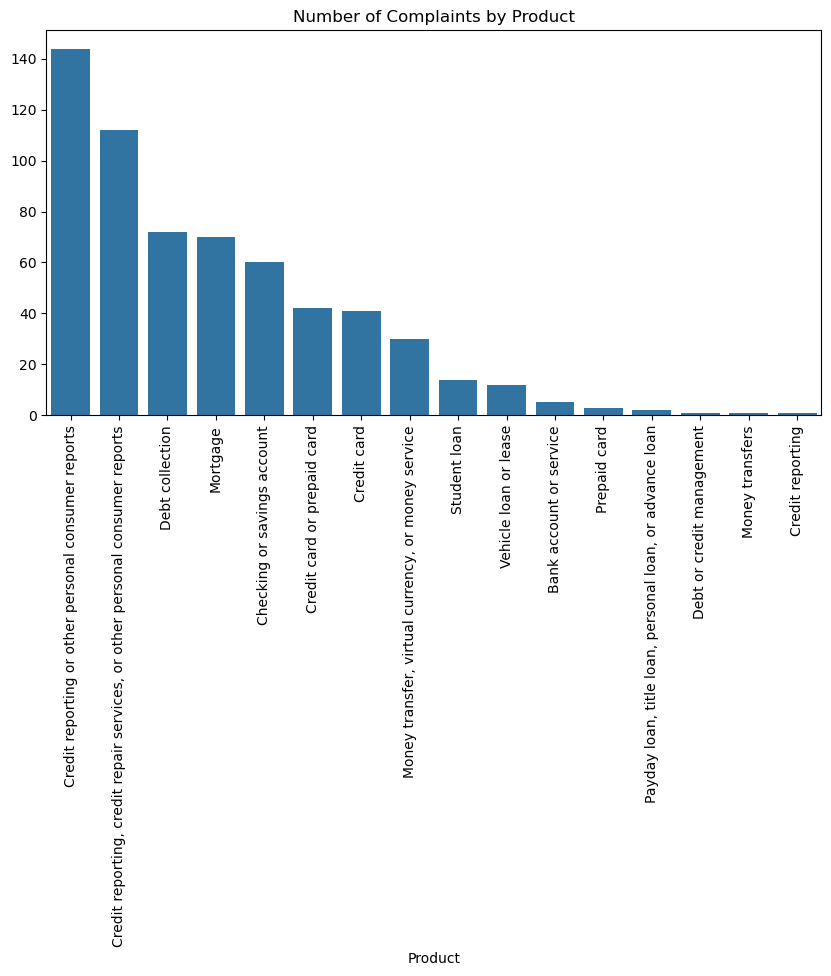

In [4]:
# Cell 4: Distribution of complaints by product
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title("Number of Complaints by Product")
plt.xticks(rotation=90)
plt.show()

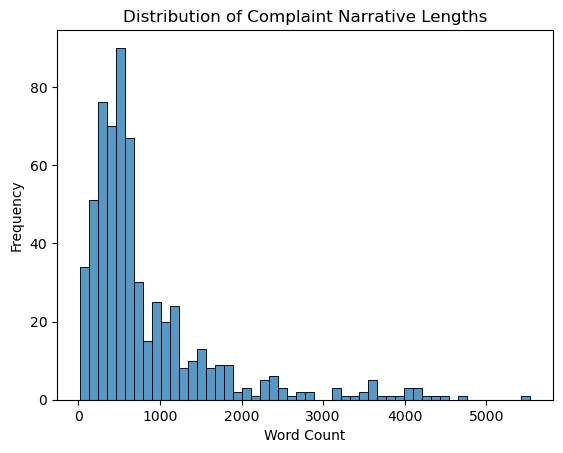

In [5]:
# Cell 5: Length of complaint narratives
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(x.split()))
sns.histplot(df['narrative_length'], bins=50)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [6]:

# Cell 6: Count of records with and without complaint narratives
has_narrative = df['Consumer complaint narrative'].notnull().sum()
no_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"With Narrative: {has_narrative}")
print(f"Without Narrative: {no_narrative}")

With Narrative: 610
Without Narrative: 0


In [7]:
#PRINT THE UNIQUE PRODUCTS
print("Unique Products:")  
print(df['Product'].unique())
# Cell 7: Filter to 5 product categories
valid_products = [
    "Credit card", 
    "Payday loan, title loan, personal loan, or advance loan",
    "Payday loan, title loan, or personal loan", 
    "Buy Now, Pay Later", 
    "Checking or savings account", 
    "Money transfers"
]

filtered_df = df[df['Product'].isin(valid_products)]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()].copy()
filtered_df.shape

Unique Products:
['Credit card or prepaid card'
 'Credit reporting or other personal consumer reports'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Vehicle loan or lease' 'Credit card' 'Mortgage' 'Debt collection'
 'Checking or savings account'
 'Money transfer, virtual currency, or money service' 'Student loan'
 'Debt or credit management' 'Prepaid card'
 'Payday loan, title loan, personal loan, or advance loan'
 'Money transfers' 'Credit reporting' 'Bank account or service']


(104, 19)

In [8]:
# Cell 8: Clean narratives
def clean_text(text):
    text = text.lower()
    text = re.sub(r'i am writing.*?complaint', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].progress_apply(clean_text)

100%|██████████████████████████████████████████████████████████████████████████████| 104/104 [00:00<00:00, 1981.28it/s]


In [9]:
# Cell 9: Save cleaned dataset
output_path = "../data/filtered_complaints.csv"
os.makedirs("../data", exist_ok=True)
filtered_df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to ../data/filtered_complaints.csv


 Summary of Findings
The dataset contains complaints across many product types.
A large proportion of complaints do not include narratives — these were excluded.
Narrative lengths vary greatly, from under 10 words to over 500. We will chunk long ones in Task 2.